# Pyber Assignment - 3 Finding - Leo Santos

1 - Company's focus has been placed in urban areas. Urban share on total rides, total drivers and total fares significantly exceed that of the other two types of areas. 

2- Company's revenue comes 62.7% from urban areas whereas 37% from non-urban areas. 

3- Average fare in non-urban areas is generally higher than in urban areas.(suburban is +26% and rural +41% higher). Increasing share in non-urban areas will have a higher marginal impact on revenue. 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
# Read the City and Ride Data
city_data_pd = pd.read_csv("data/city_data.csv")

ride_data_pd = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(ride_data_pd, city_data_pd, on ="city", how="left")
# Display the data table for preview

In [2]:
combined_data.sort_values(by='city', ascending=True)
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

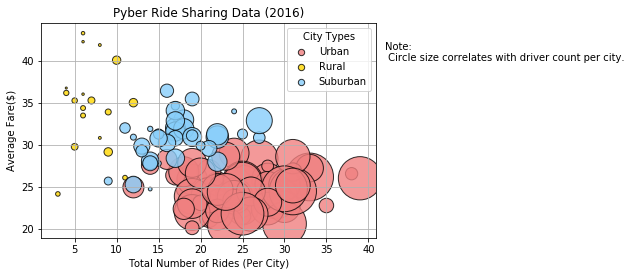

In [3]:
# Obtain the x and y coordinates for each of the three city types

#Urban x calculations
urban_data = combined_data.loc[combined_data["type"] == "Urban", :]

c_u = urban_data.groupby('city').sum()
c_m = urban_data.groupby('city').mean()
c_c = urban_data.groupby('city').count()

c_u['average fare'] = c_m['fare']
c_u['rides'] = c_c['ride_id']

#Rural x calculations
rural_data = combined_data.loc[combined_data["type"] == "Rural", :]

c_r = rural_data.groupby('city').sum()
c_m = rural_data.groupby('city').mean()
c_c = rural_data.groupby('city').count()

c_r['average fare'] = c_m['fare']
c_r['rides'] = c_c['ride_id']

#Suburban x calculations
suburban_data = combined_data.loc[combined_data["type"] == "Suburban", :]

c_s = suburban_data.groupby('city').sum()
c_m = suburban_data.groupby('city').mean()
c_c = suburban_data.groupby('city').count()

c_s['average fare'] = c_m['fare']
c_s['rides'] = c_c['ride_id']

#dataframe to capture types
a =  combined_data[['city','type','driver_count']].drop_duplicates()


#urban
xu = pd.merge(c_u, a, on="city")
x_axis_u = xu['rides'].tolist()
data_u = xu['average fare'].tolist()
dc_u = xu['driver_count_x'].tolist()
colors = xu['type'].tolist()

#rural
xr = pd.merge(c_r, a, on="city")
x_axis_r = xr['rides'].tolist()
data_r = xr['average fare'].tolist()
dc_r = xr['driver_count_x'].tolist()
colors = xu['type'].tolist()

#Suburban
xs = pd.merge(c_s, a, on="city")
x_axis_s = xs['rides'].tolist()
data_s = xs['average fare'].tolist()
dc_s = xs['driver_count_x'].tolist()
colors = xs['type'].tolist()

# Build the scatter plots for each city types
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
plt.scatter(x_axis_u, data_u, marker="o", facecolors="lightcoral", edgecolors="black",s= dc_u*3, alpha=0.80, label= "Urban")
plt.scatter(x_axis_r, data_r, marker="o", facecolors="gold", edgecolors="black",s=dc_r*3, alpha=0.80, label ="Rural")
plt.scatter(x_axis_s, data_s, marker="o", facecolors="lightskyblue", edgecolors="black",s=dc_s*3, alpha=0.80, label="Suburban")
ax.grid(True)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
# Create a legend
lgnd = plt.legend(title="City Types", loc = "upper right",  markerscale = 0.3)

lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
# Incorporate a text label regarding circle size
plt.text(42,40,"Note:\n Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyber_Ride_Data.png")

plt.show()

## Total Fares by City Type

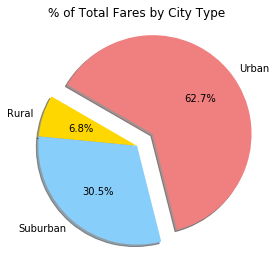

In [4]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure
c_t = combined_data.groupby('type').sum()

data_fare = c_t['fare'].tolist()

#looping fo
labels = []
con = np.arange(0, len(c_t))
for x in c_t.index:
    labels.append(x)

explode=[0,0,0.2]
    
plt.pie(data_fare, explode=explode, labels=labels, colors=["gold","lightskyblue","lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

plt.tight_layout()

plt.savefig("Total_fares_by_type.png")

plt.show()



## Total Rides by City Type

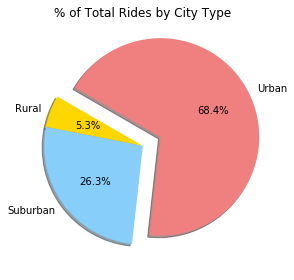

In [5]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure

d_r = combined_data.groupby('type').count()

data_rides = d_r['ride_id'].tolist()

labels1 = []
rid = np.arange(0, len(d_r))
for x in d_r.index:
    labels1.append(x)


explode=[0,0,0.2]
    
plt.pie(data_rides, explode=explode, labels=labels, colors=["gold","lightskyblue","lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

plt.tight_layout()
plt.savefig("Total_rides_by_type.png")
plt.show()

In [6]:
# Show Figure


## Total Drivers by City Type

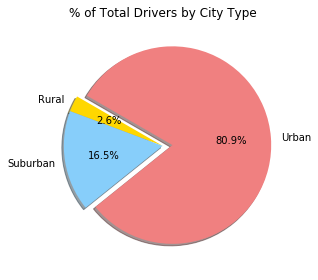

In [7]:
# Calculate Driver Percents
dd = city_data_pd.groupby('type').sum()
# Build Pie Charts


td = dd['driver_count'].tolist()
# Save Figure


explode=[0,0,0.1]
    
plt.pie(td, explode=explode, labels=labels, colors=["gold","lightskyblue","lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

plt.tight_layout()
plt.savefig("Total_drivers_by_type.png")
plt.show()
